### Importing Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

### Loading the DataSet

In [67]:
df = pd.read_csv('hotel_bookings 2.csv')

### Exploratory Data Analysis and Data Cleaning

In [68]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [69]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [70]:
df.shape

(119390, 32)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [72]:
# Convert reservation_status_date from object to datetime in the form DD/MM/YYYY
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [74]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [75]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [76]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [77]:
# Drop the 'company' and 'agent' columns from the DataFrame 'df'
# 'axis=1' specifies that we're dropping columns, not rows
# 'inplace=True' modifies the original DataFrame without creating a copy
df.drop(['company', 'agent'], axis=1, inplace=True)

# Remove any rows in the DataFrame 'df' that contain missing (NaN) values
# 'inplace=True' ensures that the changes are applied directly to the original DataFrame
df.dropna(inplace=True)

In [78]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [79]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [80]:
df = df[df['adr']< 5000]

In [81]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


### Data Analysis and Visualization

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64


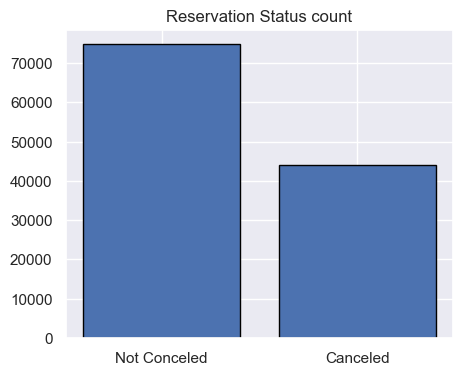

In [82]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True) * 100
print(cancelled_perc)

# Plot a pie chart to visualize the percentage of cancelled bookings:
plt.figure(figsize=(5, 4))
plt.title('Reservation Status count')
plt.bar(['Not Conceled','Canceled'], df['is_canceled'].value_counts(), edgecolor='black')
plt.show()

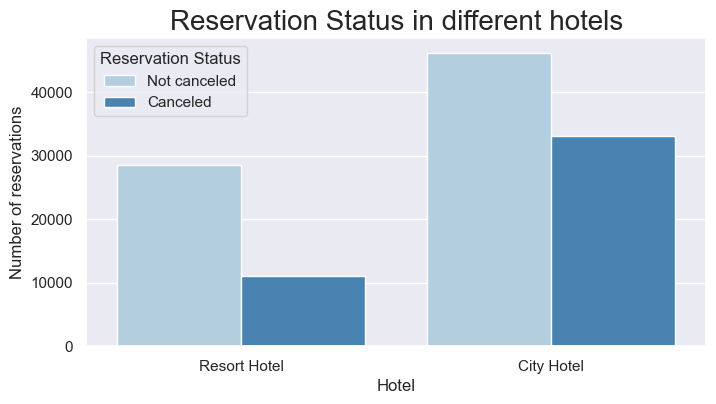

In [83]:
plt.figure(figsize=(8, 4))

# Create a count plot using Seaborn to visualize the number of reservations by hotel type
# 'x' represents the column 'hotel' on the x-axis
# 'hue' differentiates the reservations based on whether they were canceled or not (column 'is_canceled')
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation Status in different hotels', size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.legend(legend_labels, ['Not canceled', 'Canceled'], title='Reservation Status')
plt.show()

In [84]:
resort_hotels = df[df['hotel'] == 'Resort Hotel']
resort_hotels['is_canceled'].value_counts(normalize=True) * 100
# 27% of the reservations at the Resort Hotel were canceled

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [85]:
city_hotels = df[df['hotel'] == 'City Hotel']
city_hotels['is_canceled'].value_counts(normalize=True) * 100
# 41% of the reservations at the City Hotel were canceled

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

In [86]:
# Calculate the average daily rate (ADR) for each day based on the 'reservation_status_date' for resort hotels
# 'groupby' groups the data by the 'reservation_status_date' column
# 'mean()' calculates the average ADR for each group (each day)
resort_hotel = resort_hotels.groupby('reservation_status_date')['adr'].mean()

# Similarly, calculate the average daily rate (ADR) for each day for city hotels
# The same groupby and mean operations are applied to the city hotels data
city_hotel = city_hotels.groupby('reservation_status_date')['adr'].mean()

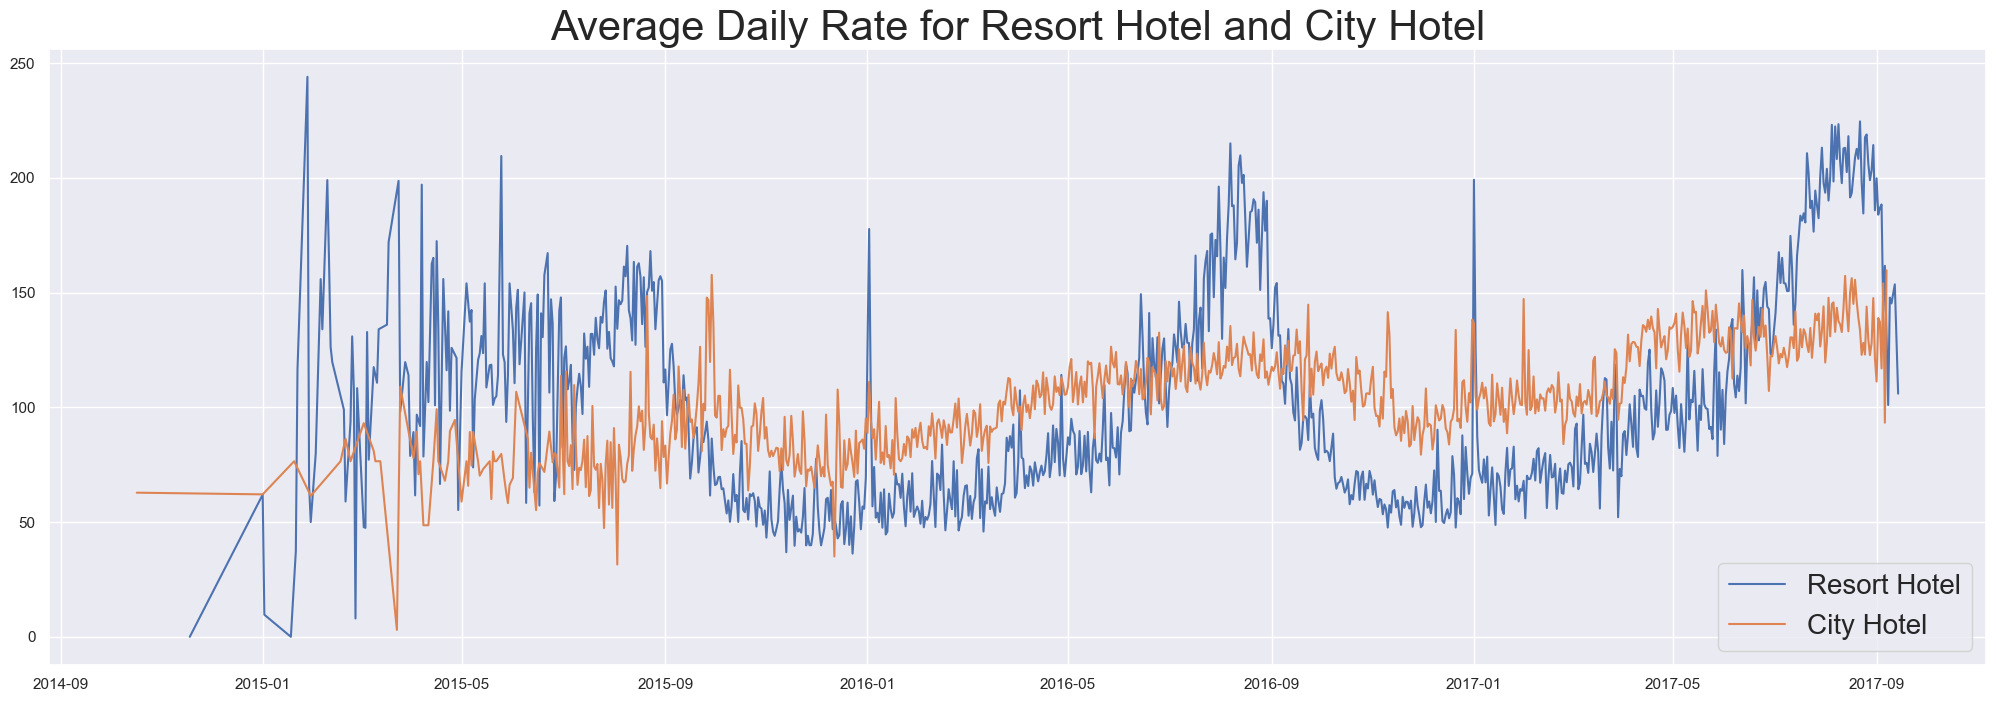

In [87]:
plt.figure(figsize=(25, 8))
plt.title('Average Daily Rate for Resort Hotel and City Hotel', size=30)

# Plot the average daily rate (ADR) for Resort Hotel

# 'resort_hotel.index' represents the dates, and 'resort_hotel.values' represents the corresponding ADR values
# 'label' specifies the label for the legend
plt.plot(resort_hotel.index, resort_hotel.values, label='Resort Hotel')

# Plot the average daily rate (ADR) for City Hotel
# The same plot function is used with 'city_hotel.index' for the dates and 'city_hotel.values' for the ADR values
plt.plot(city_hotel.index, city_hotel.values, label='City Hotel')

plt.legend(fontsize=20)
plt.show()


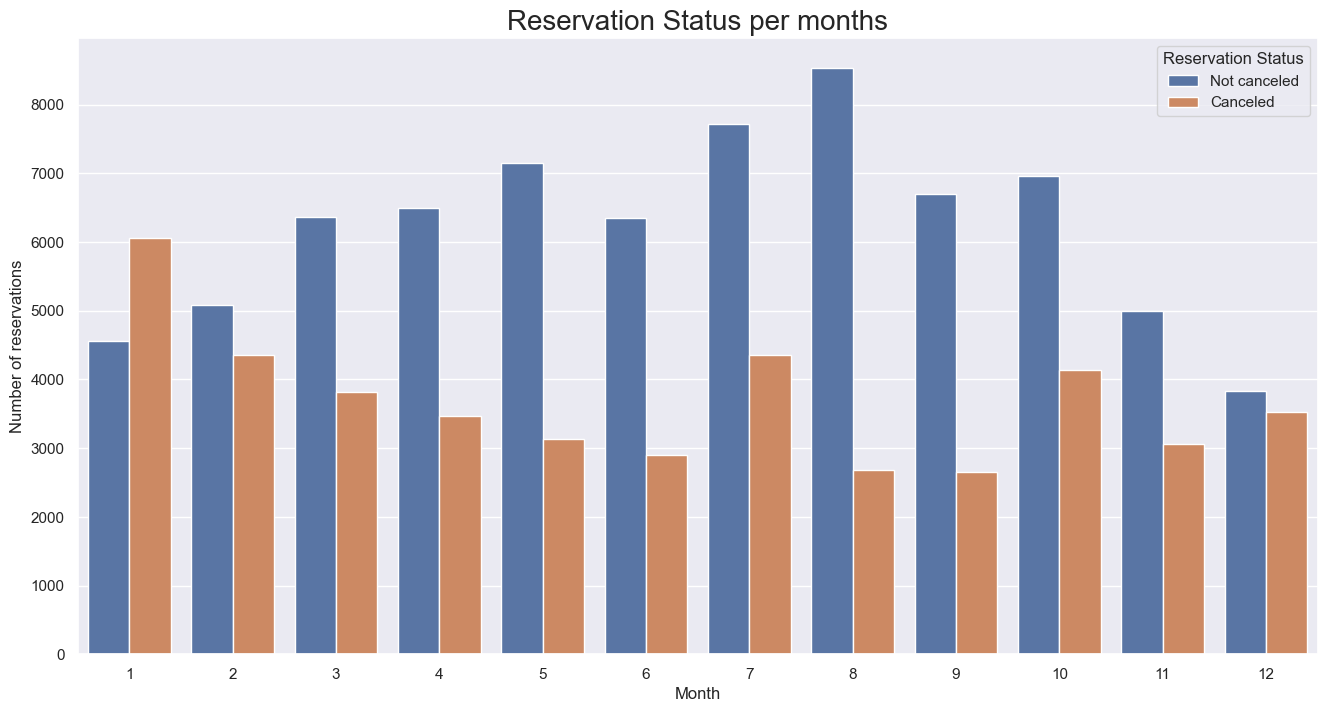

In [89]:
# Extract the month from the 'reservation_status_date' column and create a new column 'month' in the DataFrame
# 'dt.month' converts the 'reservation_status_date' into its corresponding month (1 to 12)
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(16, 8))

# Create a count plot using Seaborn to visualize the number of reservations by month
# 'x' represents the column 'month' on the x-axis
# 'hue' differentiates the reservations based on whether they were canceled or not (column 'is_canceled')
# 'data' specifies the DataFrame to use for the plot (in this case, 'df')
ax1 = sns.countplot(x='month', hue='is_canceled', data=df)

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation Status per months', size=20)
plt.xlabel('Month')
plt.ylabel('Number of reservations')
plt.legend(legend_labels, ['Not canceled', 'Canceled'], title='Reservation Status')
plt.show()

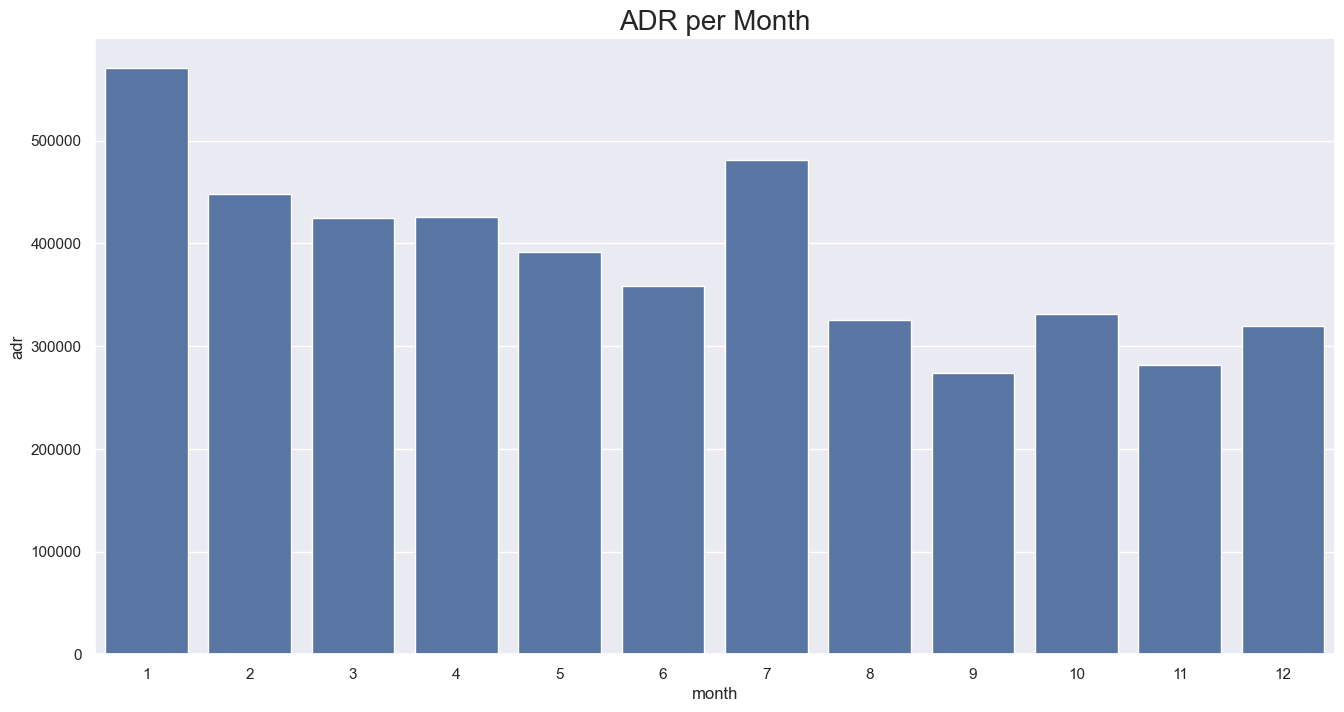

In [93]:
plt.figure(figsize=(16, 8))
plt.title('ADR per Month', size=20)

# Create a bar plot using Seaborn to visualize the total Average Daily Rate (ADR) for each month
# First, filter the DataFrame to include only canceled reservations (is_canceled == 1)
# Group the filtered data by 'month' and calculate the sum of ADR for each month
# 'reset_index()' converts the resulting DataFrame back to a standard format for plotting
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())

plt.show()


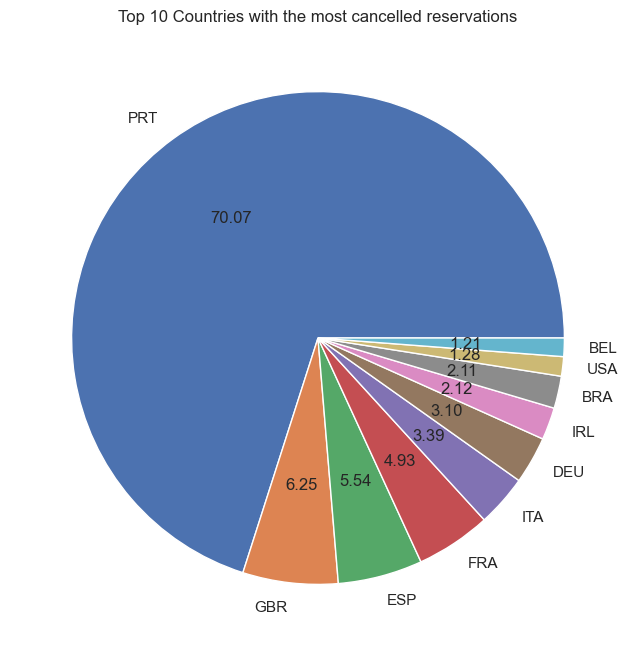

In [97]:
cancelled_data = df[df['is_canceled'] == 1]
# Count the number of canceled reservations for each country in the 'country' column
# 'value_counts()' returns a Series with the counts of unique values in the 'country' column, sorted in descending order
# '[:10]' selects the top 10 countries with the most canceled reservations
top_10_countries = cancelled_data['country'].value_counts()[:10]

plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with the most cancelled reservations')
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%.2f')
plt.show()

In [99]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [106]:
df['market_segment'].value_counts(normalize=True)*100

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: proportion, dtype: float64

In [104]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

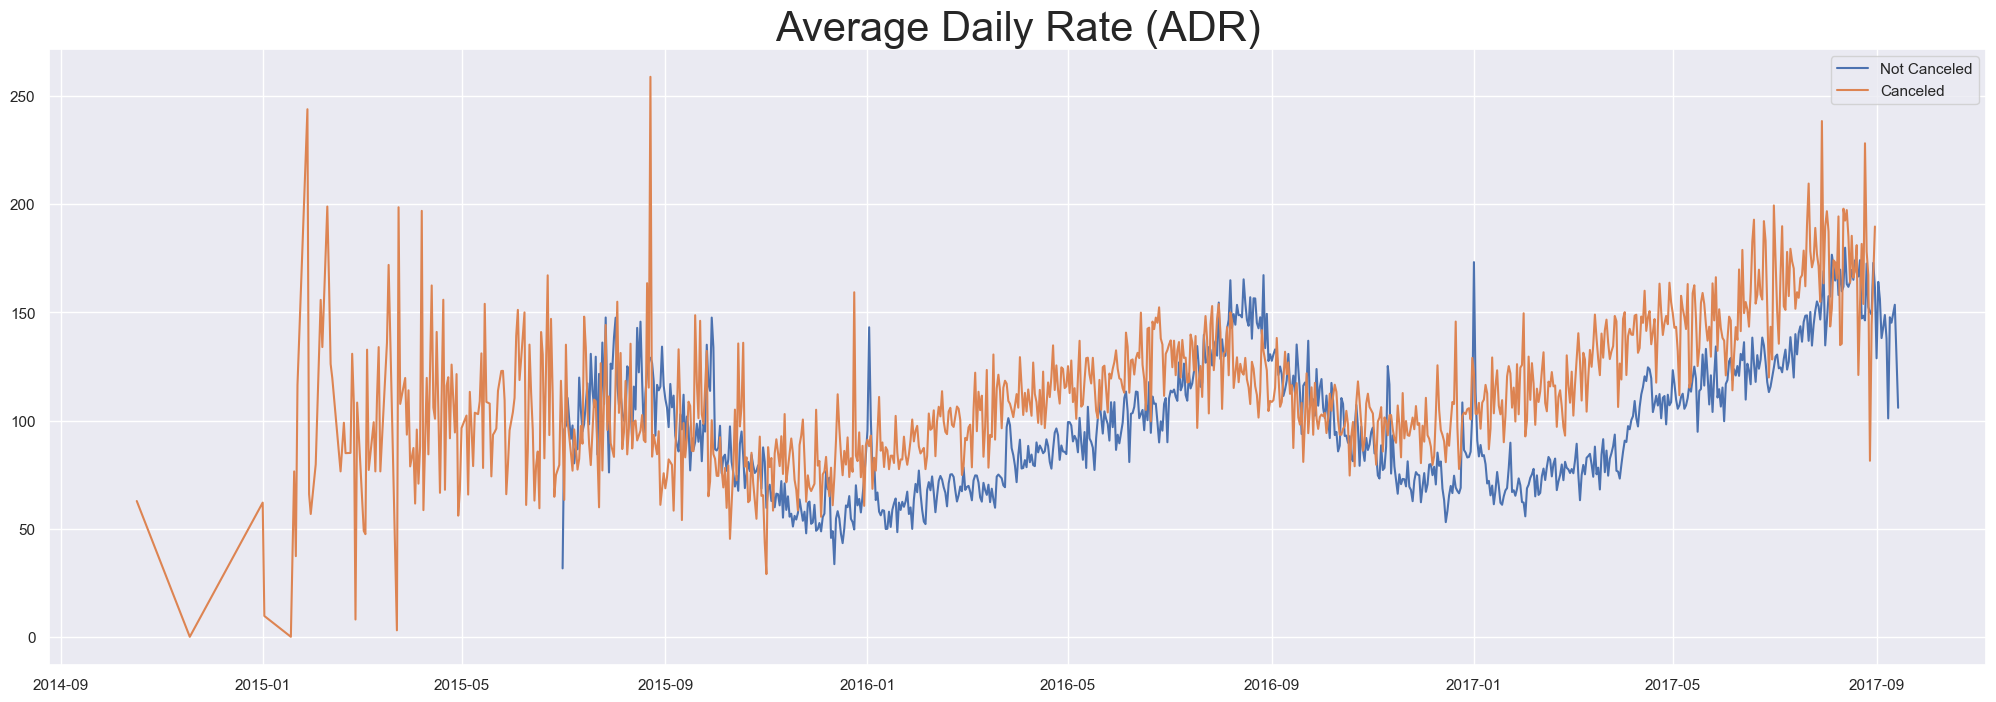

In [107]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(25, 8))
plt.title('Average Daily Rate (ADR)', size=30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Canceled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Canceled')
plt.legend()

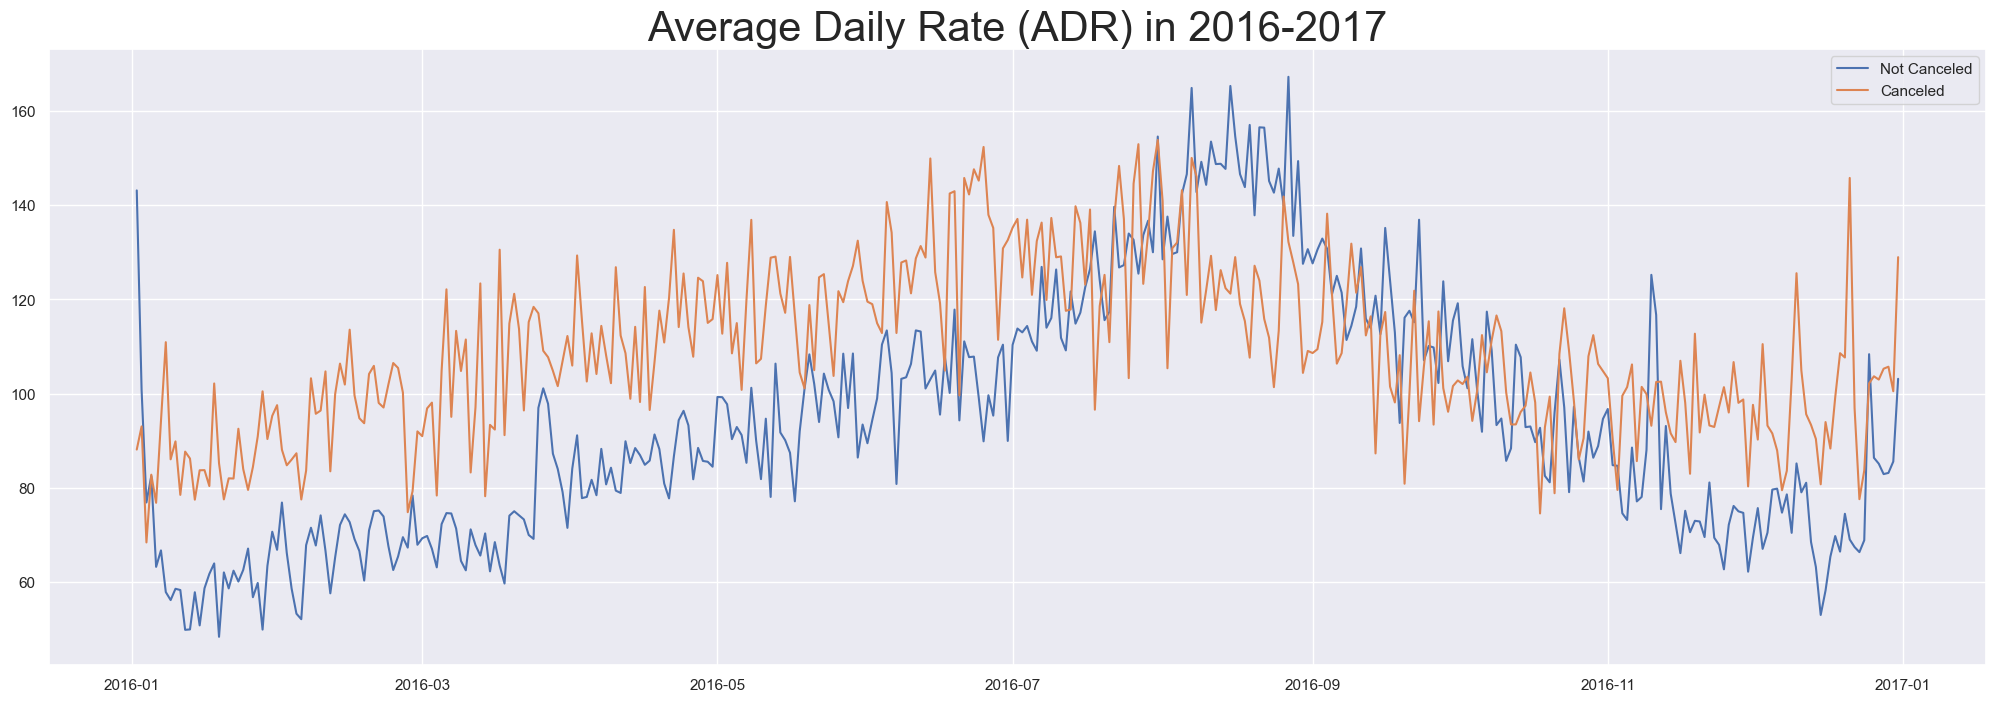

In [111]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] < '2017')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date'] < '2017')]

plt.figure(figsize=(25, 8))
plt.title('Average Daily Rate (ADR) in 2016-2017', size=30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Canceled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Canceled')
plt.legend()